# Cross-lingual Complex Word Identification

In [1]:
import os, re
import collections
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics

In [2]:
cwd_nb = os.getcwd()

cwd = os.path.dirname(cwd_nb)

os.chdir(cwd)

os.listdir(cwd+'/data/raw/traindevset/english')

['News_Dev.tsv',
 'News_Train.tsv',
 'WikiNews_Dev.tsv',
 'WikiNews_Train.tsv',
 'Wikipedia_Dev.tsv',
 'Wikipedia_Train.tsv']

In [3]:
os.getcwd()

'C:\\Users\\simon\\PycharmProjects\\Text_Mining_GroupProject\\Cross_ling_complex_word'

In [4]:
target_dir = cwd+'/data/raw/traindevset/english/'
file_list_dev = [target_dir+'News_Dev.tsv',target_dir+'WikiNews_Dev.tsv',target_dir+'Wikipedia_Dev.tsv']

In [5]:
file_list_dev

['C:\\Users\\simon\\PycharmProjects\\Text_Mining_GroupProject\\Cross_ling_complex_word/data/raw/traindevset/english/News_Dev.tsv',
 'C:\\Users\\simon\\PycharmProjects\\Text_Mining_GroupProject\\Cross_ling_complex_word/data/raw/traindevset/english/WikiNews_Dev.tsv',
 'C:\\Users\\simon\\PycharmProjects\\Text_Mining_GroupProject\\Cross_ling_complex_word/data/raw/traindevset/english/Wikipedia_Dev.tsv']

In [6]:
from src.features import build_features

In [7]:
X_dev,y_dev,w_dev,p_dev = build_features.text2feat(file_list_dev)

In [8]:
X_dev.head()

,freq,words_in_phrase,avg_wordlen_phrase,avg_char_length,vow_length,cons_length
0,0.001006,22,0.924172,0.910379,2,4
1,0.003018,22,0.924172,0.910379,2,4
2,0.000335,22,0.924172,1.062109,2,5
3,0.000335,22,0.924172,1.213838,2,6
4,0.000335,22,0.924172,0.606919,1,3


In [9]:
file_list_train = [target_dir+'News_Train.tsv',target_dir+'WikiNews_Train.tsv',target_dir+'Wikipedia_Train.tsv']

In [10]:
X_train,y_train,w_train,p_train = build_features.text2feat(file_list_train)

In [11]:
X_train.head()

,freq,words_in_phrase,avg_wordlen_phrase,avg_char_length,vow_length,cons_length
0,0.000045,32,0.703895,0.900986,2,4
1,0.000045,32,0.703895,0.750822,2,3
2,0.000135,32,0.703895,1.051151,2,5
3,0.000045,32,0.703895,0.750822,2,3
4,0.000045,32,0.703895,1.201315,3,5


### Naive Bayes

In [12]:
gnb = GaussianNB()

In [13]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_pred_bayes = gnb.predict(X_dev)

In [15]:
sklearn.metrics.confusion_matrix(y_dev, y_pred_bayes)

array([[855, 144],
       [227, 252]], dtype=int64)

In [16]:
sklearn.metrics.accuracy_score(y_dev,y_pred_bayes)

0.7489851150202977

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_metrics(y_dev,y_pred):
    acc = sklearn.metrics.accuracy_score(y_dev,y_pred)
    print('Accuracy: %2.2f' % (acc))

    a = sklearn.metrics.confusion_matrix(y_dev, y_pred)
    print('Confusion matrix:')
    print(a)
    
   # fig, ax = plt.subplots()
   # im = ax.imshow(a)

    # Loop over data dimensions and create text annotations.
   # for i in range(2):
   #     for j in range(2):
   #         text = ax.text(j, i, a[i, j],ha="center", va="center", color="w")
   # return acc        




In [18]:
_ = plot_metrics(y_dev, y_pred_bayes)

Accuracy: 0.75
Confusion matrix:
[[855 144]
 [227 252]]


### Decision Tree

In [19]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=5)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_dev)
plot_metrics(y_dev,y_pred_tree)

Accuracy: 0.74
Confusion matrix:
[[926  73]
 [316 163]]


In [20]:
import graphviz 
feature_names=X_train.columns
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=['Not Complex','Complex'],       
                         filled=True, rounded=True,  
                         special_characters=True)  
#graph = graphviz.Source(dot_data)  
#graph


### Gradient Tree Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, \
                                 max_depth=1, random_state=0)

clf.fit(X_train,y_train)
clf.score(X_dev, y_dev)  

0.7462787550744249

In [22]:
y_pred_boost = clf.predict(X_dev)

In [23]:
plot_metrics(y_dev,y_pred_boost)

Accuracy: 0.75
Confusion matrix:
[[924  75]
 [300 179]]


In [24]:
clf.feature_importances_

array([0.35109134, 0.01444004, 0.00871042, 0.58685081, 0.0355468 ,
       0.00336058])

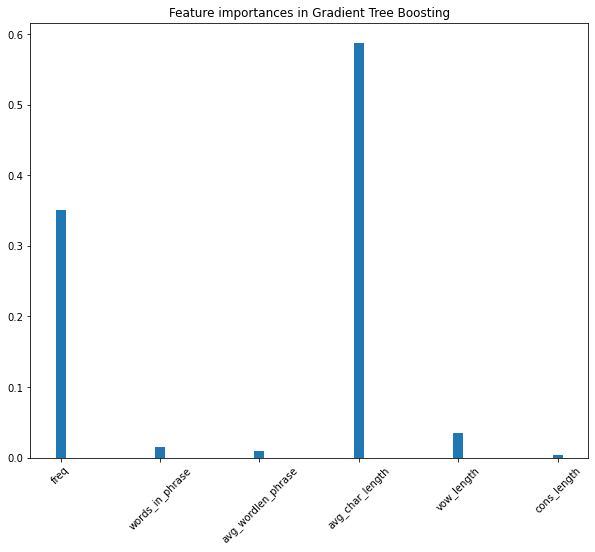

In [25]:
fi = clf.feature_importances_
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(range(len(fi)),height=fi, width=0.1)
plt.xticks(range(len(fi)),X_train.columns,rotation=45)
plt.title('Feature importances in Gradient Tree Boosting')
fig.savefig('FeatureImportance.png')

In [26]:
X_train.columns

Index(['freq', 'words_in_phrase', 'avg_wordlen_phrase', 'avg_char_length',
       'vow_length', 'cons_length'],
      dtype='object')

In [27]:
X_train.head()

,freq,words_in_phrase,avg_wordlen_phrase,avg_char_length,vow_length,cons_length
0,0.000045,32,0.703895,0.900986,2,4
1,0.000045,32,0.703895,0.750822,2,3
2,0.000135,32,0.703895,1.051151,2,5
3,0.000045,32,0.703895,0.750822,2,3
4,0.000045,32,0.703895,1.201315,3,5


### Support Vector Machines

In [28]:
from sklearn import svm

clf = svm.SVC(gamma=0.01,C=10)
clf.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y_pred_svm = clf.predict(X_dev)

In [30]:
plot_metrics(y_dev,y_pred_svm)

Accuracy: 0.73
Confusion matrix:
[[960  39]
 [367 112]]


In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [32]:
p = svc_param_selection(X_train, y_train, 5)

In [33]:
p

{'C': 1, 'gamma': 0.1}

In [34]:
clf_new = svm.SVC(gamma=0.1,C=1)
clf_new.fit(X_train,y_train)
y_pred_svm_new = clf_new.predict(X_dev)
plot_metrics(y_dev,y_pred_svm_new)

Accuracy: 0.73
Confusion matrix:
[[946  53]
 [348 131]]


## German Testset

In [40]:
#ger_dir = './traindevset/german/'
ger_dir = cwd+'/data/raw/traindevset/german/'
file_list_dev_ger = [ger_dir+'German_Dev.tsv',]

In [41]:
file_list_dev_ger

['C:\\Users\\simon\\PycharmProjects\\Text_Mining_GroupProject\\Cross_ling_complex_word/data/raw/traindevset/german/German_Dev.tsv']

In [42]:
X_dev_ger,y_dev_ger,w_dev_ger,p_dev_ger = build_features.text2feat(file_list_dev_ger)

In [43]:
X_dev_ger.head()

,freq,words_in_phrase,avg_wordlen_phrase,avg_char_length,vow_length,cons_length
0,0.000589,14,0.55127,1.403234,3,9
1,0.001177,14,0.55127,1.052425,3,6
2,0.001177,14,0.55127,0.584681,2,3
3,0.000589,14,0.55127,0.350808,1,2
4,0.001177,14,0.55127,0.818553,1,6


In [44]:
w_dev_ger.head()

0    Unterhändler
1       Konferenz
2           sagte
3             Weg
4         gewählt
Name: complexPhrase, dtype: object

In [45]:
y_pred_bayes_ger = gnb.predict(X_dev_ger)

In [46]:
plot_metrics(y_dev_ger, y_pred_bayes_ger)

Accuracy: 0.77
Confusion matrix:
[[361  96]
 [ 69 190]]


## Spanish 

In [47]:
sp_dir = cwd+'/data/raw/traindevset/spanish/'
file_list_dev_sp = [sp_dir+'Spanish_Dev.tsv',]

In [50]:
X_dev_sp,y_dev_sp,w_dev_sp,p_dev_sp = build_features.text2feat(file_list_dev_sp)

In [51]:
y_pred_bayes_sp = gnb.predict(X_dev_sp)

In [52]:
plot_metrics(y_dev_sp,y_pred_bayes_sp)

Accuracy: 0.67
Confusion matrix:
[[682 287]
 [171 265]]


## French

In [59]:
fr_dir = cwd+'/data/raw/traindevset/french/'
file_list_test_fr = [fr_dir+'French_Test.tsv',]
file_list_test_fr

['C:\\Users\\simon\\PycharmProjects\\Text_Mining_GroupProject\\Cross_ling_complex_word/data/raw/traindevset/french/French_Test.tsv']

In [60]:
X_test_fr,y_test_fr,w_test_fr,p_test_fr = build_features.text2feat(file_list_test_fr)

In [61]:
y_pred_bayes_fr = gnb.predict(X_test_fr)
plot_metrics(y_test_fr,y_pred_bayes_fr)

Accuracy: 0.67
Confusion matrix:
[[1094  500]
 [ 164  250]]


## Plots

In [62]:
X_train.head()

,freq,words_in_phrase,avg_wordlen_phrase,avg_char_length,vow_length,cons_length
0,0.000045,32,0.703895,0.900986,2,4
1,0.000045,32,0.703895,0.750822,2,3
2,0.000135,32,0.703895,1.051151,2,5
3,0.000045,32,0.703895,0.750822,2,3
4,0.000045,32,0.703895,1.201315,3,5


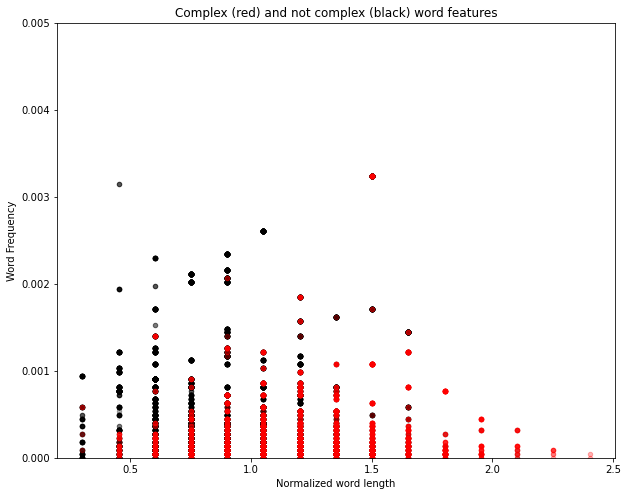

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))

x0 = X_train.loc[y_train==0,'avg_char_length']
y0 = X_train.loc[y_train==0,'freq']
plt.scatter(x0,y0,s=20,alpha=0.3,c='k')

x1 = X_train.loc[y_train==1,'avg_char_length']
y1 = X_train.loc[y_train==1,'freq']
plt.scatter(x1,y1,s=20,alpha=0.3,c='red')
plt.xlabel('Normalized word length')
plt.ylabel('Word Frequency')
plt.ylim((0,0.005))
plt.title('Complex (red) and not complex (black) word features')
fig.savefig('WordFrequencyOverWordLength.png')

In [ ]:
#w_train[y_train==1]

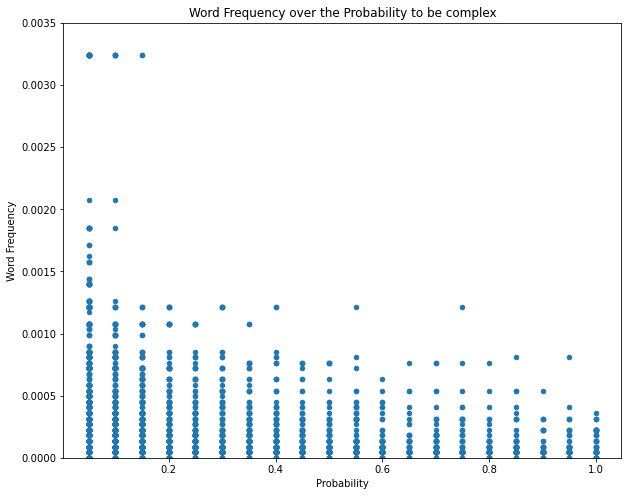

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))


x1 = p_train.loc[y_train==1]
y1 = X_train.loc[y_train==1,'freq']

plt.scatter(x1,y1,s=20)
plt.xlabel('Probability')
plt.ylabel('Word Frequency')
plt.ylim((0,0.0035))
plt.title('Word Frequency over the Probability to be complex')
fig.savefig('WordFrequencyOverProbability.png')

### Model Performance

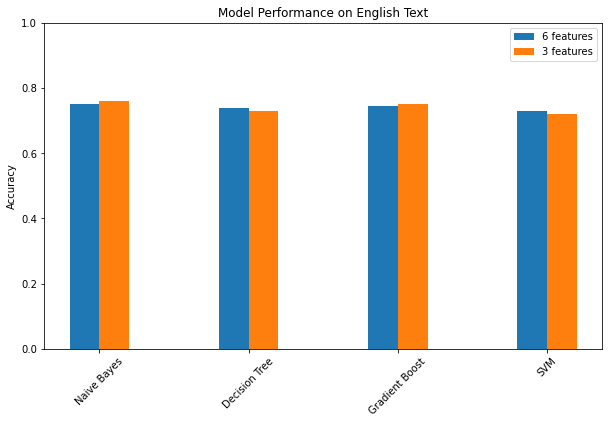

In [65]:
xlabels = ['Naive Bayes','Decision Tree','Gradient Boost','SVM']
y_all = [0.75, 0.74, 0.746, 0.73]
y = [0.76, 0.73, 0.75, 0.72]
x = np.array(range(len(y)))
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x-0.1,height=y_all, width=0.2)
plt.bar(x+0.1,height=y, width=0.2)
plt.xticks(range(len(y)),xlabels,rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Performance on English Text')
plt.legend(['6 features','3 features'],loc='upper right')
plt.ylim((0,1))
fig.savefig('ModelComparison.png')

### Naive Bayes for different languages

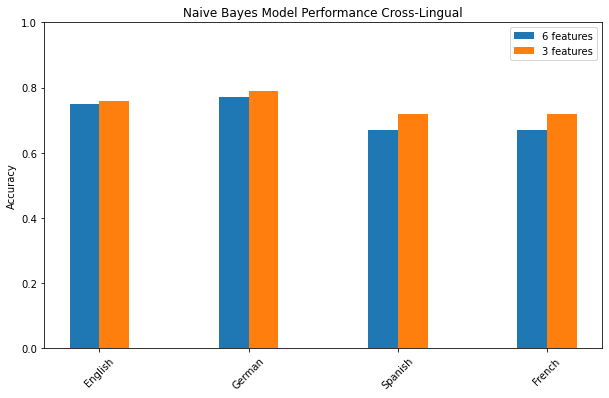

In [66]:
xlabels = ['English','German','Spanish','French']
y_all = [0.75, 0.77, 0.67, 0.67]
y = [0.76, 0.79, 0.72, 0.72]
x = np.array(range(len(y)))
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x-0.1,height=y_all, width=0.2)
plt.bar(x+0.1,height=y, width=0.2)
plt.xticks(range(len(y)),xlabels,rotation=45)
plt.ylabel('Accuracy')
plt.title('Naive Bayes Model Performance Cross-Lingual')
plt.legend(['6 features','3 features'],loc='upper right')
plt.ylim((0,1))
fig.savefig('Cross-LanguageComparison.png')